## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how= 'inner')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.duplicated(['Mouse ID', 'Timepoint'], keep = 'last')


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice[duplicate_mice].index.values


array([908, 910, 912, 914, 916], dtype=int64)

In [5]:
combined_data.iloc[908:918]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#I'm not sure how to rename this when there is a space in the column name...
combined_data.rename(columns={'Mouse ID':'Mouse_ID'}, inplace=True)

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data[combined_data.Mouse_ID != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_data['Mouse_ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_mean = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].mean().to_frame()
drug_median = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].median().to_frame()
drug_variance = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].var().to_frame()
drug_std = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].std().to_frame()
drug_sem = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].sem().to_frame()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
#Renaming the columns for better readability
drug_mean.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Mean"}, inplace=True)
drug_median.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Median"}, inplace=True)
drug_variance.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Variance"}, inplace=True)
drug_std.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"}, inplace=True)
drug_sem.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume SEM"}, inplace=True)

drug_regimen_frame = drug_mean.merge(drug_median, left_index = True, right_on = 'Drug Regimen')
drug_regimen_frame = drug_regimen_frame.merge(drug_variance, left_index = True, right_on = 'Drug Regimen')
drug_regimen_frame = drug_regimen_frame.merge(drug_std, left_index = True, right_on = 'Drug Regimen')
drug_regimen_frame = drug_regimen_frame.merge(drug_sem, left_index = True, right_on = 'Drug Regimen')




In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_frame
# Using the aggregation method, produce the same summary statistics in a single line

#I don't understand this one. Do you want the summary statistics as a whole within one line of output? Or the above 
#dataframe in one line? I'm stumped. 


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


#create x axis label
xlabel = 'Drug Regiment'

#plot
#.plot(kind='bar', use_index = True,
            # color = ['lightblue'],  figsize=(15,10))

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



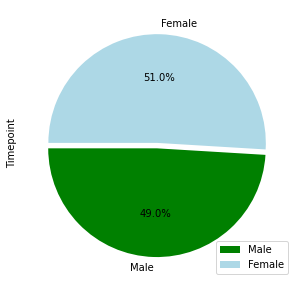

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_labels = combined_data["Sex"].unique()

#calculate gender counts
gender_data = combined_data.groupby(['Sex']).count()

# pie plot values
gender_values = [958,925]

#colors for plotting
colors = ['green', 'lightblue']

#distance of plot section break
explode = (0.05, 0)



#plot
gender_data.plot(kind = 'pie', figsize=(5,5), y = "Timepoint", explode=explode, labels = pie_labels, colors = colors, 
    autopct="%1.1f%%", startangle=180)
#fix legend location
plt.legend(loc='lower right')


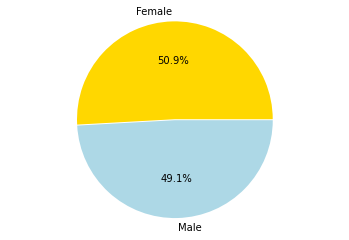

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data_pyplot = [958,925]
labels_pyplot = ['Female', 'Male']
colors_pyplot = ['gold', 'lightblue']
explode_pyplot = (.01,0)
plt.pie(gender_data_pyplot, labels=labels_pyplot, colors=colors_pyplot, explode=explode_pyplot, autopct='%1.1f%%')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
combined_data.head(10)


,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Define drugs involved
# Put treatments into a list for for loop (and later for plot labels)
drug_ramicane = combined_data["Drug Regimen"] == 'Ramicane'
drug_capomulin = combined_data["Drug Regimen"] == 'Capomulin'
drug_infubinol = combined_data["Drug Regimen"] == 'Infubinol'
drug_ceftamin = combined_data["Drug Regimen"] == 'Ceftamin'

drug_names = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data
tumor_volumes = []   

def fn(drug_name):
    tumor_volumes.append(combined_data.loc[combined_data["Drug Regimen"] == drug_name].groupby(['Mouse_ID'])['Timepoint'].max().reset_index())
for drug_name in drug_names:
    fn(drug_name)
    
# Create empty list to fill with tumor vol data
tumor_volumes = []    


#Begin to separate mice by regimen and timepoint to show distinguish between drug regimens
drug_temp = combined_data.loc[combined_data['Drug Regimen'].isin(drug_names)]

#Find greatest timepoint for each mouse
tumor_vol_final_df = drug_temp.groupby(drug_temp['Mouse_ID']).agg({'Timepoint':['max']})
tumor_vol_final_df.columns = ['Timepoint']
tumor_vol_final_df


,Timepoint
Mouse_ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [16]:
#Merge df with original to get tumor volume at greatest timepoint
tumor_vol_final_df = tumor_vol_final_df.reset_index()

tumor_vol_final_df = pd.merge(tumor_vol_final_df, combined_data, how='left', on=["Mouse_ID", "Timepoint"])
tumor_vol_final_df

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_names:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
    # add subset 
tumor_volumes.append(tumor_vol_by_drug)

In [18]:
# Determine outliers using upper and lower bounds
quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for drug in drug_names:
    print(f'The IQR of {drug} is {iqr}')
    print(f'For {drug}, values below {lower_bound} are outliers')
    print(f'For {drug}, values above {upper_bound} are outliers\n')    

The IQR of Ramicane is 15.577752179999997
For Ramicane, values below 25.355449580000002 are outliers
For Ramicane, values above 87.66645829999999 are outliers

The IQR of Capomulin is 15.577752179999997
For Capomulin, values below 25.355449580000002 are outliers
For Capomulin, values above 87.66645829999999 are outliers

The IQR of Infubinol is 15.577752179999997
For Infubinol, values below 25.355449580000002 are outliers
For Infubinol, values above 87.66645829999999 are outliers

The IQR of Ceftamin is 15.577752179999997
For Ceftamin, values below 25.355449580000002 are outliers
For Ceftamin, values above 87.66645829999999 are outliers



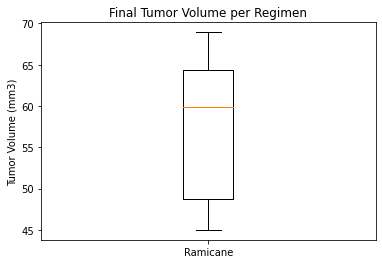

In [19]:
#Generate a box plot
red_plus = dict(markerfacecolor='r', marker='P')

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')

for drug in drug_names:
    ax.set_xticklabels(drug_names)


ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=red_plus)
plt.show()

#Why won't they all show???!!?!

## Line and Scatter Plots

Text(0, 0.5, 'Avg Tumor Vol')

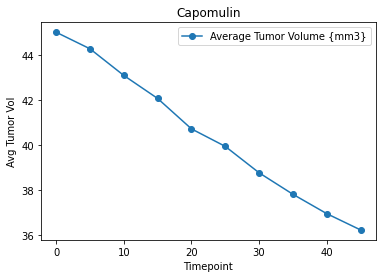

In [20]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin
cap_avg_tumor_grp = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin'].groupby(combined_data['Timepoint']).agg({'Tumor Volume (mm3)':['mean']})
cap_avg_tumor_grp.columns = ['Average Tumor Volume {mm3}']

# plot data
ax = cap_avg_tumor_grp.plot(kind="line", title="Capomulin", marker="o")
ax.set_ylabel("Avg Tumor Vol")

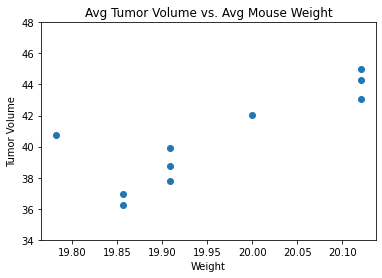

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg_tumor_wgt = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin'].groupby(combined_data['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
cap_avg_tumor_wgt.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.ylim(34,48)

cap_avg_tumor_wgt
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [28]:
correlation = st.pearsonr(atv,amw)
print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(amw,atv)
regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {regression}')

The correlation between Average Tumor Volume and Mouse Weight is 0.82
The linear regression equation is y = 20.29x + -364.52
